In [ ]:
#for mathematical computation

import numpy as np
import pandas as pd
import scipy.stats as stats

#for data visualization

import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
from matplotlib.pyplot import figure

% matplotlib inline

In [ ]:
df = pd.read_csv("/content/IPO.csv", encoding='latin-1')
df.head()

,Date,IPO_Name,Issue_Size(crores),QIB,HNI,RII,Issue_price,Listing_Open,Listing_Close,Listing_Gains(%),CMP,Current_gains
0,26-11-21,Tarsons Product,1030.22,1.06,3.40,2.49,662.0,700.0,840.00,26.89,641.45,-3.10
1,23-11-21,Latent View,622.11,145.48,850.66,119.44,197.0,530.0,488.60,148.02,639.85,224.80
2,18-11-21,Sapphire Foods,2073.00,3.11,2.34,5.25,1180.0,1311.0,1216.05,3.06,"1,048.05",-11.18
3,18-11-21,One 97(Paytm),18915.90,2.79,0.24,1.66,2150.0,1955.0,1564.15,-27.25,"1,655.00",-23.02
4,15-11-21,SJS Enterprises,816.57,1.42,2.32,1.38,542.0,514.0,509.85,-5.93,441.05,-18.63


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                288 non-null    object 
 1   IPO_Name            288 non-null    object 
 2   Issue_Size(crores)  288 non-null    float64
 3   QIB                 288 non-null    float64
 4   HNI                 288 non-null    float64
 5   RII                 288 non-null    float64
 6   Issue_price         288 non-null    float64
 7   Listing_Open        288 non-null    float64
 8   Listing_Close       288 non-null    float64
 9   Listing_Gains(%)    288 non-null    float64
 10  CMP                 288 non-null    object 
 11  Current_gains       286 non-null    float64
dtypes: float64(9), object(3)
memory usage: 27.1+ KB


In [ ]:
df.describe()

,Issue_Size(crores),QIB,HNI,RII,Issue_price,Listing_Open,Listing_Close,Listing_Gains(%),Current_gains
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,286.000000
mean,1118.383750,24.834688,71.413646,8.341181,368.913194,438.374653,396.502917,5.993056,65.616573
std,2160.932743,37.837647,142.500596,14.159700,361.287606,458.703932,439.609061,49.354577,261.408128
min,0.000000,0.000000,0.000000,0.000000,0.000000,9.500000,1.570000,-97.150000,-99.930000
25%,156.142500,1.147500,1.210000,1.367500,113.750000,125.200000,104.112500,-11.340000,-73.785000
50%,474.000000,4.810000,5.075000,3.405000,242.500000,272.200000,234.555000,2.315000,-1.800000
75%,1049.480000,35.492500,73.295000,8.535000,522.500000,600.000000,584.975000,25.780000,114.397500
max,18915.900000,176.850000,958.070000,119.440000,2150.000000,2725.000000,3118.650000,270.400000,2478.690000


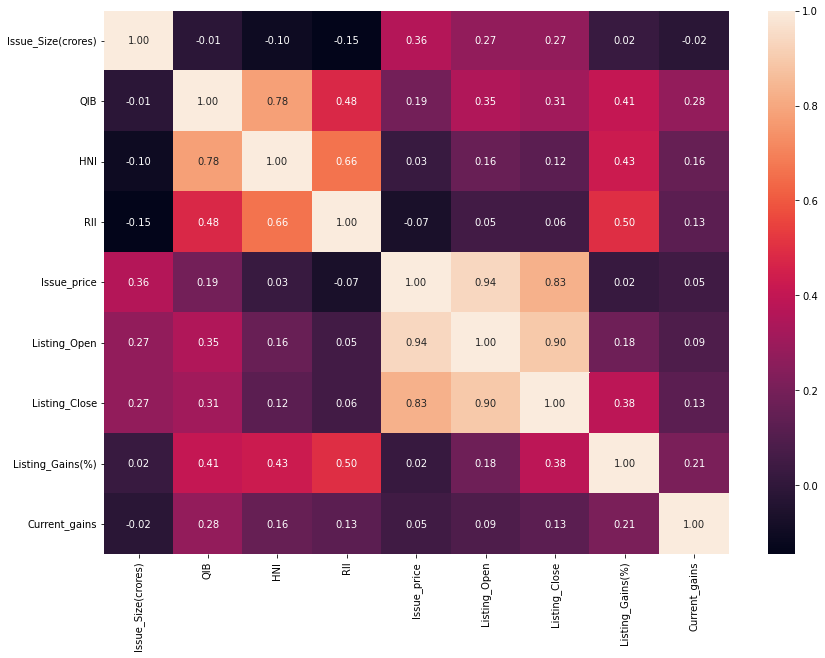

In [ ]:
f,ax = plt.subplots(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax)
plt.show()

In [ ]:
date = df.Date.str.split('-', expand =True)
df['year'] = date[2]
df['month'] = date[1]
df['day'] = date[0]

df.year = pd.to_numeric(df.year)
df.month = pd.to_numeric(df.month)
df.day = pd.to_numeric(df.day)

In [ ]:
df.head()

,Date,IPO_Name,Issue_Size(crores),QIB,HNI,RII,Issue_price,Listing_Open,Listing_Close,Listing_Gains(%),CMP,Current_gains,year,month,day
0,26-11-21,Tarsons Product,1030.22,1.06,3.40,2.49,662.0,700.0,840.00,26.89,641.45,-3.10,21,11,26
1,23-11-21,Latent View,622.11,145.48,850.66,119.44,197.0,530.0,488.60,148.02,639.85,224.80,21,11,23
2,18-11-21,Sapphire Foods,2073.00,3.11,2.34,5.25,1180.0,1311.0,1216.05,3.06,"1,048.05",-11.18,21,11,18
3,18-11-21,One 97(Paytm),18915.90,2.79,0.24,1.66,2150.0,1955.0,1564.15,-27.25,"1,655.00",-23.02,21,11,18
4,15-11-21,SJS Enterprises,816.57,1.42,2.32,1.38,542.0,514.0,509.85,-5.93,441.05,-18.63,21,11,15


In [ ]:
fig1 = px.pie(df, names='year')
fig1.show()

In [ ]:
fig2 = px.pie(df, names='month')
fig2.show()

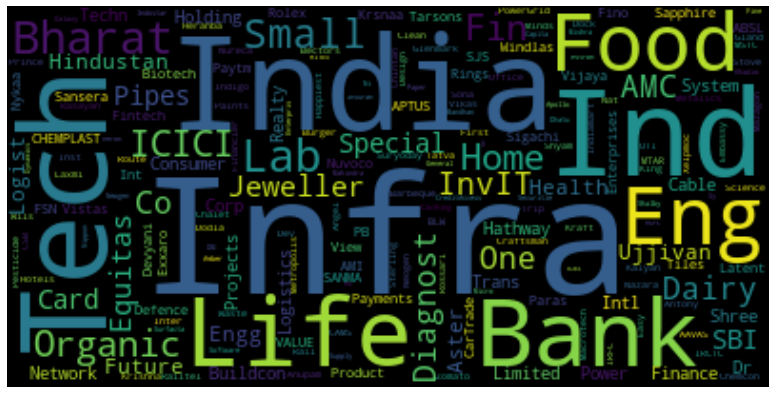

In [ ]:
from wordcloud import WordCloud
wordCloud = WordCloud().generate(' '.join(df.IPO_Name))

plt.figure(figsize=(15,7))
plt.axis('off')
plt.imshow(wordCloud, interpolation='bilinear')
plt.show()

In [ ]:
top_gainer = df.groupby('IPO_Name').sum().sort_values('Listing_Gains(%)', ascending=False).head(20)
top_gainer = top_gainer.reset_index()
px.bar(x='IPO_Name', y ="Listing_Gains(%)", data_frame=top_gainer)

In [ ]:
x = df[df['IPO_Name'] == 'Sigachi Ind']
x

,Date,IPO_Name,Issue_Size(crores),QIB,HNI,RII,Issue_price,Listing_Open,Listing_Close,Listing_Gains(%),CMP,Current_gains,year,month,day
6,15-11-21,Sigachi Ind,0.0,42.15,78.82,41.26,163.0,575.0,603.75,270.4,429.35,163.4,21,11,15


In [ ]:
top_loser = df.groupby('IPO_Name').sum().sort_values('Listing_Gains(%)', ascending=True).head(20)
top_loser = top_loser.reset_index()
px.bar(x='IPO_Name', y ="Listing_Gains(%)", data_frame=top_loser)

In [ ]:
x2 = df[df['IPO_Name'] == 'VKS Projects']
x2

,Date,IPO_Name,Issue_Size(crores),QIB,HNI,RII,Issue_price,Listing_Open,Listing_Close,Listing_Gains(%),CMP,Current_gains,year,month,day
186,18-07-12,VKS Projects,55.0,1.15,0.38,1.13,55.0,55.8,1.57,-97.15,0.04,-99.93,12,7,18


In [ ]:
current_top_gainers = df.groupby('IPO_Name').sum().sort_values('Current_gains', ascending=False).head(20)
current_top_gainers = current_top_gainers.reset_index()
px.bar(x='IPO_Name', y ="Current_gains", data_frame=current_top_gainers)

In [ ]:
x3 = df[df['IPO_Name'] == 'Jubilant Food']
x3

,Date,IPO_Name,Issue_Size(crores),QIB,HNI,RII,Issue_price,Listing_Open,Listing_Close,Listing_Gains(%),CMP,Current_gains,year,month,day
286,08-02-10,Jubilant Food,328.7,59.39,51.95,3.79,145.0,160.0,114.5,-21.03,"3,739.10",2478.69,10,2,8


In [ ]:
issue_size = df.groupby('IPO_Name').sum().sort_values('Issue_Size(crores)', ascending=False).head(20)
issue_size = issue_size.reset_index()
px.bar(x='IPO_Name', y ="Issue_Size(crores)", data_frame=issue_size)

In [ ]:
x4 = df[df['year'] == 21]
x4

,Date,IPO_Name,Issue_Size(crores),QIB,HNI,RII,Issue_price,Listing_Open,Listing_Close,Listing_Gains(%),CMP,Current_gains,year,month,day
0,26-11-21,Tarsons Product,1030.22,1.06,3.40,2.49,662.0,700.00,840.00,26.89,641.45,-3.10,21,11,26
1,23-11-21,Latent View,622.11,145.48,850.66,119.44,197.0,530.00,488.60,148.02,639.85,224.80,21,11,23
2,18-11-21,Sapphire Foods,2073.00,3.11,2.34,5.25,1180.0,1311.00,1216.05,3.06,"1,048.05",-11.18,21,11,18
3,18-11-21,One 97(Paytm),18915.90,2.79,0.24,1.66,2150.0,1955.00,1564.15,-27.25,"1,655.00",-23.02,21,11,18
4,15-11-21,SJS Enterprises,816.57,1.42,2.32,1.38,542.0,514.00,509.85,-5.93,441.05,-18.63,21,11,15
5,15-11-21,PB Fintech,6273.50,9.83,2.58,1.67,980.0,1444.00,1202.90,22.74,"1,210.50",23.52,21,11,15
6,15-11-21,Sigachi Ind,0.00,42.15,78.82,41.26,163.0,575.00,603.75,270.40,429.35,163.40,21,11,15
7,12-11-21,Fino Payments,1209.00,1.65,0.21,5.92,577.0,548.00,545.25,-5.50,409.90,-28.96,21,11,12
8,10-11-21,FSN E-Co(Nykaa),5375.00,91.18,112.02,12.24,1125.0,2001.00,2206.70,96.15,"2,252.00",100.18,21,11,10
9,11-10-21,ABSL AMC,2768.00,4.10,2.60,1.68,712.0,697.50,699.65,-1.73,585.45,-17.77,21,10,11
